In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
edu_df = pd.read_csv('../input/edwu.csv')

In [23]:
edu_df.head()

,調査年 コード,調査年,地域 コード,地域,/項目,E9101_最終学歴人口（卒業者総数）【人】,E9106_最終学歴人口（大学・大学院）【人】
0,2010100000,2010年度,1100,北海道 札幌市,NaN,1552253,250223
1,2010100000,2010年度,1202,北海道 函館市,NaN,232696,21988
2,2010100000,2010年度,1203,北海道 小樽市,NaN,111107,10884
3,2010100000,2010年度,1204,北海道 旭川市,NaN,287696,30002
4,2010100000,2010年度,1205,北海道 室蘭市,NaN,77773,7137


In [24]:
edu_df.columns = ['year_code', 'year', 'dest_code',' dest', 'item', 'amount', 'univ']

In [25]:
edu_df.drop(['year', 'item'], axis=1, inplace=True)

In [26]:
edu_df.head()

,year_code,dest_code,dest,amount,univ
0,2010100000,1100,北海道 札幌市,1552253,250223
1,2010100000,1202,北海道 函館市,232696,21988
2,2010100000,1203,北海道 小樽市,111107,10884
3,2010100000,1204,北海道 旭川市,287696,30002
4,2010100000,1205,北海道 室蘭市,77773,7137


In [27]:
edu_df['Per'] = edu_df.univ/ edu_df.amount

In [28]:
edu_df

,year_code,dest_code,dest,amount,univ,Per
0,2010100000,1100,北海道 札幌市,1552253,250223,0.161200
1,2010100000,1202,北海道 函館市,232696,21988,0.094492
2,2010100000,1203,北海道 小樽市,111107,10884,0.097960
3,2010100000,1204,北海道 旭川市,287696,30002,0.104284
4,2010100000,1205,北海道 室蘭市,77773,7137,0.091767
...,...,...,...,...,...,...
1736,2010100000,47361,沖縄県 久米島町,6702,657,0.098030
1737,2010100000,47362,沖縄県 八重瀬町,19660,2314,0.117701
1738,2010100000,47375,沖縄県 多良間村,952,60,0.063025
1739,2010100000,47381,沖縄県 竹富町,3220,458,0.142236


In [29]:
incom_df = pd.read_csv('../input/edu.csv')

In [30]:
incom_df.head()

,調査年 コード,調査年,地域 コード,地域,/項目,C120110_課税対象所得【千円】,C120120_納税義務者数（所得割）【人】,F2201_第1次産業就業者数【人】,F2211_第2次産業就業者数【人】,F2221_第3次産業就業者数【人】
0,2015100000,2015年度,1100,北海道 札幌市,NaN,2535322425,834364,3790,118503,645868
1,2015100000,2015年度,1202,北海道 函館市,NaN,295671670,108641,4137,19490,86480
2,2015100000,2015年度,1203,北海道 小樽市,NaN,119533070,48037,710,8909,39508
3,2015100000,2015年度,1204,北海道 旭川市,NaN,380049303,139822,4069,26028,116152
4,2015100000,2015年度,1205,北海道 室蘭市,NaN,102184822,36100,351,9384,26169


In [31]:
incom_df.columns = ['year_code', 'year', 'dest_code', 'dest', 'item', 'income',\
                    'amount', 'primary','secondary', 'third']

In [32]:
incom_df.drop(['year', 'item','dest'], axis=1, inplace=True)

In [34]:
incom_df.drop(['year_code'], axis=1, inplace=True)

In [35]:
incom_df.head()

,dest_code,income,amount,primary,secondary,third
0,1100,2535322425,834364,3790,118503,645868
1,1202,295671670,108641,4137,19490,86480
2,1203,119533070,48037,710,8909,39508
3,1204,380049303,139822,4069,26028,116152
4,1205,102184822,36100,351,9384,26169


In [36]:
merged_df = pd.merge(incom_df,edu_df, on='dest_code', how='right')

In [37]:
merged_df

,dest_code,income,amount_x,primary,secondary,third,year_code,dest,amount_y,univ,Per
0,1100,2535322425,834364,3790,118503,645868,2010100000,北海道 札幌市,1552253,250223,0.161200
1,1202,295671670,108641,4137,19490,86480,2010100000,北海道 函館市,232696,21988,0.094492
2,1203,119533070,48037,710,8909,39508,2010100000,北海道 小樽市,111107,10884,0.097960
3,1204,380049303,139822,4069,26028,116152,2010100000,北海道 旭川市,287696,30002,0.104284
4,1205,102184822,36100,351,9384,26169,2010100000,北海道 室蘭市,77773,7137,0.091767
...,...,...,...,...,...,...,...,...,...,...,...
1736,47361,5904396,2434,1057,578,2268,2010100000,沖縄県 久米島町,6702,657,0.098030
1737,47362,22772529,9861,1095,2022,8991,2010100000,沖縄県 八重瀬町,19660,2314,0.117701
1738,47375,698683,273,258,83,279,2010100000,沖縄県 多良間村,952,60,0.063025
1739,47381,3192927,1370,349,112,1651,2010100000,沖縄県 竹富町,3220,458,0.142236


In [38]:
merged_df['a_man'] = merged_df['income']/merged_df['amount_x']

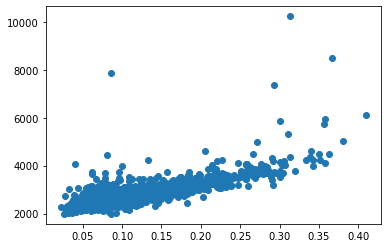

In [40]:
plt.scatter( merged_df['Per'], merged_df['a_man'])